# Emission processing of NETCDF datafiles
Developed by Alejandro Delgado with the support of Mario Gavidia.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Open NETCDF files

In [2]:
# First domain:
i_d01 = ['wrfchemi_00z_d01_ind' , 'wrfchemi_12z_d01_ind' ]
v_d01 = ['wrfchemi_00z_d01_veic', 'wrfchemi_12z_d01_veic']
r_d01 = ['wrfchemi_00z_d01_res' , 'wrfchemi_12z_d01_res' ]

# Second domain
i_d02 = ['wrfchemi_00z_d02_ind' , 'wrfchemi_12z_d02_ind' ]
v_d02 = ['wrfchemi_00z_d02_veic', 'wrfchemi_12z_d02_veic']
r_d02 = ['wrfchemi_00z_d02_res' , 'wrfchemi_12z_d02_res' ]

def readnc(path = '/Volumes/passport/Dissertation/data/wrfchemis/', file= i_d01[0]):
    fnc = path+file
    print('Reading ', fnc)
    ncfile = xr.open_dataset(fnc)
    return ncfile

# D01
ind_00z_d01 = readnc(file=i_d01[0])
ind_12z_d01 = readnc(file=i_d01[1])
vei_00z_d01 = readnc(file=v_d01[0])
vei_12z_d01 = readnc(file=v_d01[1])
res_00z_d01 = readnc(file=r_d01[0])
res_12z_d01 = readnc(file=r_d01[1])

# D02
ind_00z_d02 = readnc(file=i_d02[0])
ind_12z_d02 = readnc(file=i_d02[1])
vei_00z_d02 = readnc(file=v_d02[0])
vei_12z_d02 = readnc(file=v_d02[1])
res_00z_d02 = readnc(file=r_d02[0])
res_12z_d02 = readnc(file=r_d02[1])


Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_00z_d01_ind
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_12z_d01_ind
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_00z_d01_veic
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_12z_d01_veic
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_00z_d01_res
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_12z_d01_res
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_00z_d02_ind
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_12z_d02_ind
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_00z_d02_veic
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_12z_d02_veic
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_00z_d02_res
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_12z_d02_res


In [3]:
#ind_00z_d01.info()

In [4]:
#res_00z_d01.info()

In [5]:
#vei_00z_d01.info()

In [6]:
# Checking shapes
print(ind_00z_d01.dims)
print(res_00z_d01.dims)
print(vei_00z_d01.dims)

Frozen(SortedKeysDict({'Time': 12, 'south_north': 59, 'west_east': 89, 'emissions_zdim_stag': 1}))
Frozen(SortedKeysDict({'Time': 12, 'south_north': 59, 'west_east': 89, 'emissions_zdim_stag': 1}))
Frozen(SortedKeysDict({'Time': 12, 'emissions_zdim': 1, 'south_north': 59, 'west_east': 89}))


In [7]:
print(ind_12z_d01.dims)
print(res_12z_d01.dims)
print(vei_12z_d01.dims)

Frozen(SortedKeysDict({'Time': 12, 'south_north': 59, 'west_east': 89, 'emissions_zdim_stag': 1}))
Frozen(SortedKeysDict({'Time': 12, 'south_north': 59, 'west_east': 89, 'emissions_zdim_stag': 1}))
Frozen(SortedKeysDict({'Time': 12, 'emissions_zdim': 1, 'south_north': 59, 'west_east': 89}))


We define species of emission rates:

In [8]:
emi_esp = ['E_CO'  , 'E_HCHO', 'E_C2H5OH', 'E_KET'  , 'E_NH3'  , 'E_XYL',
           'E_TOL' , 'E_ISO' , 'E_OLI'   , 'E_OLT'  , 'E_OL2'  , 'E_HC8',
           'E_HC5' , 'E_ORA2', 'E_ETH'   , 'E_ALD'  , 'E_CSL'  , 'E_SO2', 
           'E_HC3' , 'E_NO2' , 'E_NO'    , 'E_CH3OH', 'E_PM25I', 'E_PM25J',
           'E_SO4I', 'E_SO4J', 'E_NO3I'  , 'E_NO3J' , 'E_ORGI' , 'E_ORGJ', 
           'E_ECI' , 'E_ECJ' , 'E_SO4C'  , 'E_NO3C' , 'E_ORGC' , 'E_ECC'] # 36 species

## EDGAR_HTAP generated by antro_emiss

In [9]:
hour  = 11
max_e = 200 # mol km^-2 hr^-1

### Industry sources

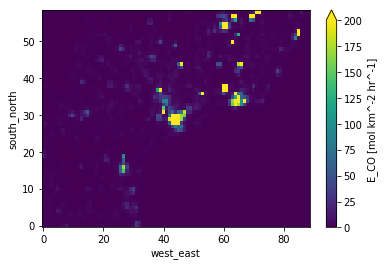

In [10]:
ind_00z_d01.E_CO.isel(Time=hour).plot(vmax=max_e);

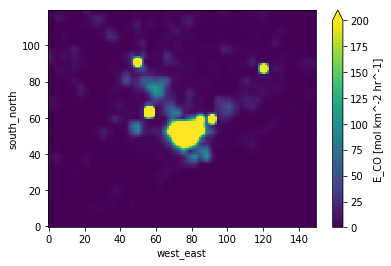

In [11]:
ind_00z_d02.E_CO.isel(Time=hour).plot(vmax=max_e);

### Residential sources

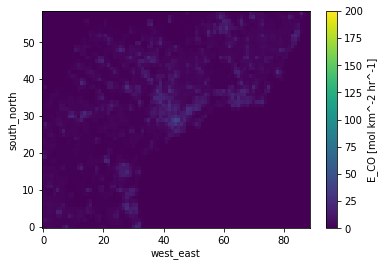

In [12]:
res_00z_d01.E_CO.isel(Time=hour).plot(vmax=max_e);

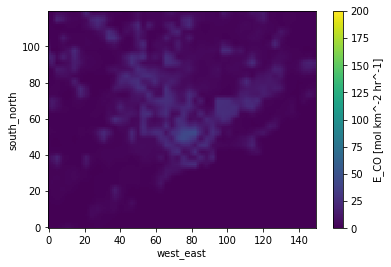

In [13]:
res_00z_d02.E_CO.isel(Time=hour).plot(vmax=max_e);

## LAPAt model for vehicle sources
Spatial emission rates generated by `wrfchemi_cbmz_fc.ncl`, used by Andrade et al. (2015).

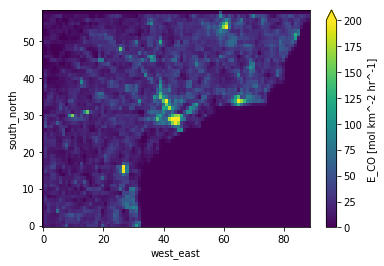

In [14]:
vei_00z_d01.E_CO.isel(Time=hour).plot(vmax=max_e);

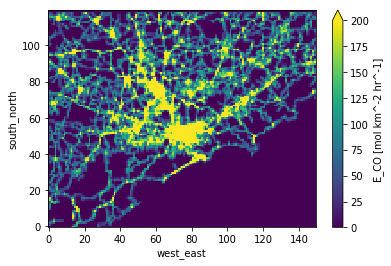

In [15]:
vei_00z_d02.E_CO.isel(Time=hour).plot(vmax=max_e);

## Join emission files as one file

In [16]:
to_add = set(ind_00z_d02.data_vars).intersection(emi_esp) # the same for residential (res)
to_add

{'E_ALD',
 'E_C2H5OH',
 'E_CH3OH',
 'E_CO',
 'E_ETH',
 'E_HC3',
 'E_HC5',
 'E_HC8',
 'E_HCHO',
 'E_ISO',
 'E_KET',
 'E_NH3',
 'E_NO',
 'E_NO2',
 'E_OL2',
 'E_OLI',
 'E_OLT',
 'E_SO2',
 'E_TOL',
 'E_XYL'}

In [17]:
def htap_plus_local(veic, ind, res, esp_to_add):
    for emi in esp_to_add:
        veic[emi] += ind[emi].values + res[emi].values
    return veic

In [18]:
total_00z_d01 = htap_plus_local(vei_00z_d01, ind_00z_d01, res_00z_d01, to_add)
total_12z_d01 = htap_plus_local(vei_12z_d01, ind_12z_d01, res_12z_d01, to_add)
total_00z_d02 = htap_plus_local(vei_00z_d02, ind_00z_d02, res_00z_d02, to_add)
total_12z_d02 = htap_plus_local(vei_12z_d02, ind_12z_d02, res_12z_d02, to_add)

In [20]:
# Export then to netcdf
total_00z_d01.to_netcdf('wrfchemi_00z_d01_total.nc')
total_12z_d01.to_netcdf('wrfchemi_12z_d01_total.nc')
total_00z_d02.to_netcdf('wrfchemi_00z_d02_total.nc')
total_12z_d02.to_netcdf('wrfchemi_12z_d02_total.nc')

In [21]:
total_00z_d01 = xr.open_dataset('wrfchemi_00z_d01_total.nc')
total_12z_d01 = xr.open_dataset('wrfchemi_12z_d01_total.nc')
total_00z_d02 = xr.open_dataset('wrfchemi_00z_d02_total.nc')
total_12z_d02 = xr.open_dataset('wrfchemi_12z_d02_total.nc')

# D01
vei_00z_d01 = readnc(file=v_d01[0])
vei_12z_d01 = readnc(file=v_d01[1])

# D02
vei_00z_d02 = readnc(file=v_d02[0])
vei_12z_d02 = readnc(file=v_d02[1])

Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_00z_d01_veic
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_12z_d01_veic
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_00z_d02_veic
Reading  /Volumes/passport/Dissertation/data/wrfchemis/wrfchemi_12z_d02_veic


## Verification
For domain 01:

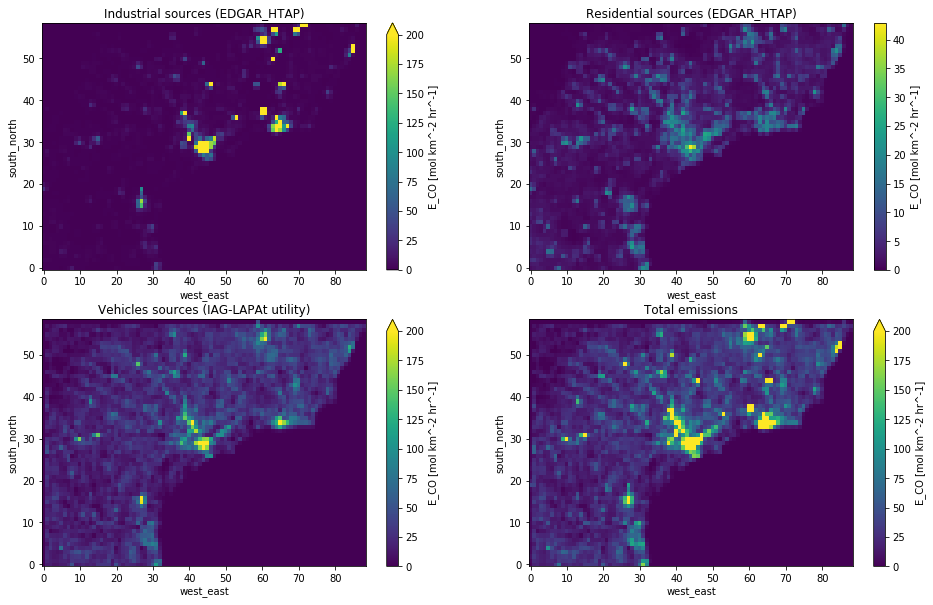

In [22]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
ind_00z_d01.E_CO.isel(Time=hour).plot(vmax=max_e)
plt.title("Industrial sources (EDGAR_HTAP)")

plt.subplot(2,2,2)
res_00z_d01.E_CO.isel(Time=hour).plot()
plt.title("Residential sources (EDGAR_HTAP)")

plt.subplot(2,2,3)
vei_00z_d01.E_CO.isel(Time=hour).plot(vmax=max_e)
plt.title("Vehicles sources (IAG-LAPAt utility)")

plt.subplot(2,2,4)
total_00z_d01.E_CO.isel(Time=hour).plot(vmax=max_e)
plt.title("Total emissions")
plt.savefig('CO_emissions_d01.pdf', bbox_inches='tight', format='pdf');

For domain 02:

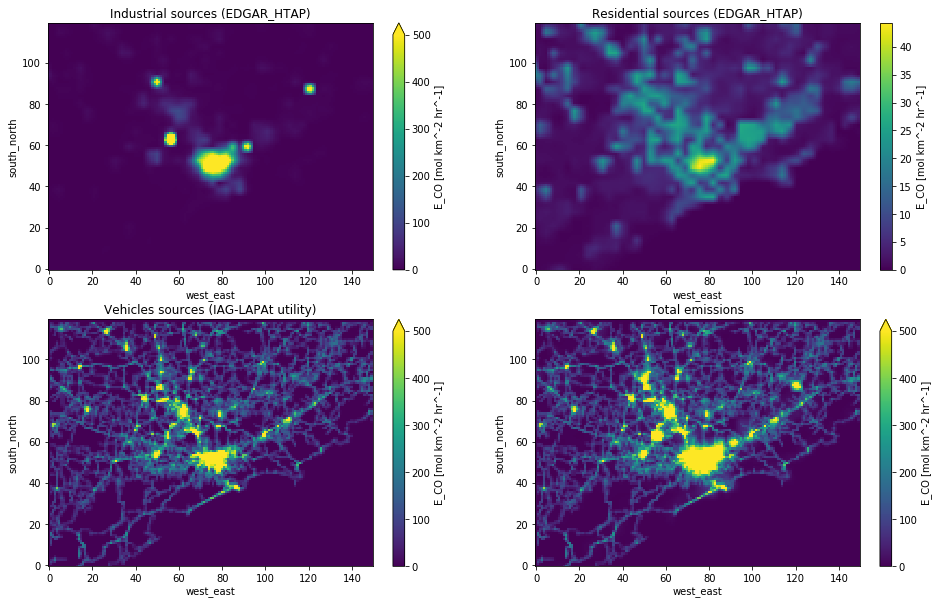

In [23]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
ind_00z_d02.E_CO.isel(Time=hour).plot(vmax=500)
plt.title("Industrial sources (EDGAR_HTAP)")

plt.subplot(2,2,2)
res_00z_d02.E_CO.isel(Time=hour).plot()
plt.title("Residential sources (EDGAR_HTAP)")

plt.subplot(2,2,3)
vei_00z_d02.E_CO.isel(Time=hour).plot(vmax=500)
plt.title("Vehicles sources (IAG-LAPAt utility)")

plt.subplot(2,2,4)
total_00z_d02.E_CO.isel(Time=hour).plot(vmax=500)
plt.title("Total emissions")
plt.savefig('CO_emissions_d02.pdf', bbox_inches='tight', format='pdf');

## Hourly time plot

In [24]:
# For domain 01:
def TimeplotEmi(pol = 'E_CO'):
    v00 = np.sum(vei_00z_d01[pol].values)
    v12 = np.sum(vei_12z_d01[pol].values)
    t00 = np.sum(total_00z_d01[pol].values)
    t12 = np.sum(total_12z_d01[pol].values)
    vei = v00+v12
    total = t00+t12
    print("Sum of vehi. "+pol+"    : {:8.2f}".format(vei) +" mol km^-2 day^-1" )
    print("Sum of total "+pol+"    : {:8.2f}".format(total) +" mol km^-2 day^-1" )
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    vei_00z_d01.plot.scatter(x='Times', y=pol)
    vei_12z_d01.plot.scatter(x='Times', y=pol)
    plt.title("{:8.2f}".format(vei)+" [mol km$^{-2}$ day$^{-1}$]")
    plt.xticks(rotation=90)
    plt.subplot(122)
    total_00z_d01.plot.scatter(x='Times', y=pol)
    total_12z_d01.plot.scatter(x='Times', y=pol)
    plt.xticks(rotation=90)
    plt.title("{:8.2f}".format(total)+" [mol km$^{-2}$ day$^{-1}$]")

Sum of vehi. E_CO    : 1393712.12 mol km^-2 day^-1
Sum of total E_CO    : 3219018.50 mol km^-2 day^-1


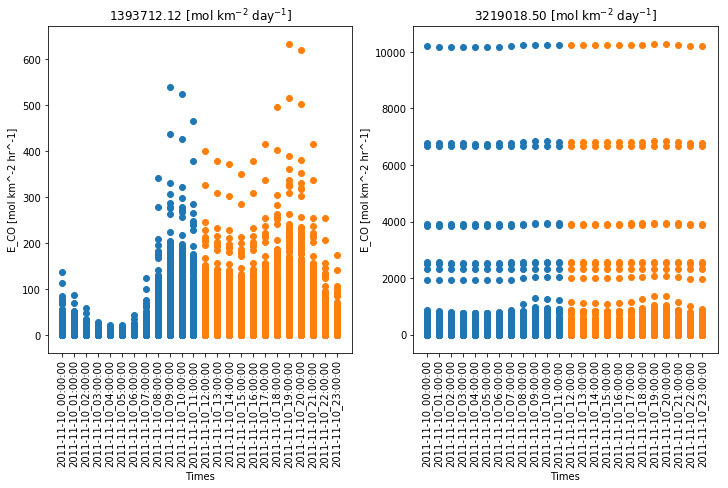

In [25]:
TimeplotEmi('E_CO')